In [ ]:
# Installing required library to access the data repository
!pip install ucimlrepo

In [ ]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Now, we have to fetch the Iris dataset from the repository
# Fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [ ]:
# Checking Dependent and Independent Features
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [ ]:
y['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# We can see that there is an dependent target variable y ("class")

### Problem Statement 1 : Implement K-Means Clustering in Python on Iris Dataset
#### Note : Iris Dataset can be used for both Supervised and Un-Supervised Learning Purpose (For the given problem statement - Un-Supervised)

In [ ]:
# Inspecting the given data
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
X.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


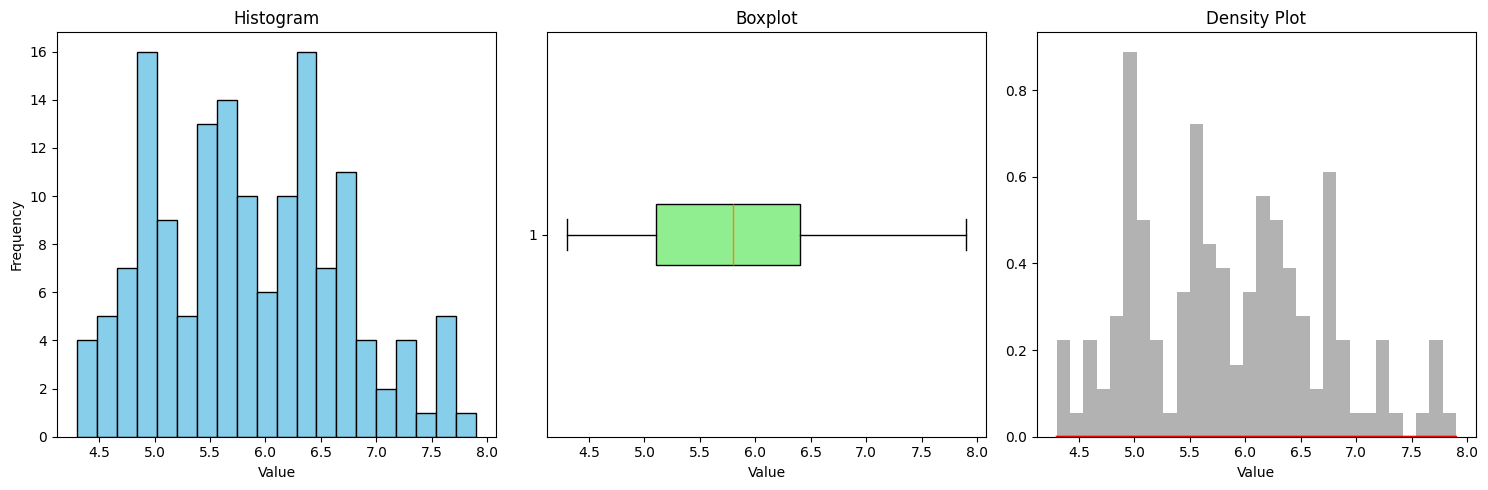

In [ ]:
# Visualization :
# Create a figure with multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. Histogram
axes[0].hist(X['sepal length'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# 2. Boxplot
axes[1].boxplot(X['sepal length'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Value')

# 3. Density Plot
axes[2].hist(X['sepal length'], bins=30, density=True, alpha=0.6, color='gray')
density, bins, _ = axes[2].hist(X['sepal length'], bins=30, density=True, alpha=0)
axes[2].plot(bins, 1/(10 * np.sqrt(2 * np.pi)) * np.exp( - (bins - 50)**2 / (2 * 10**2) ), color='red')
axes[2].set_title('Density Plot')
axes[2].set_xlabel('Value')

# Adjust layout and display
plt.tight_layout()
plt.show()

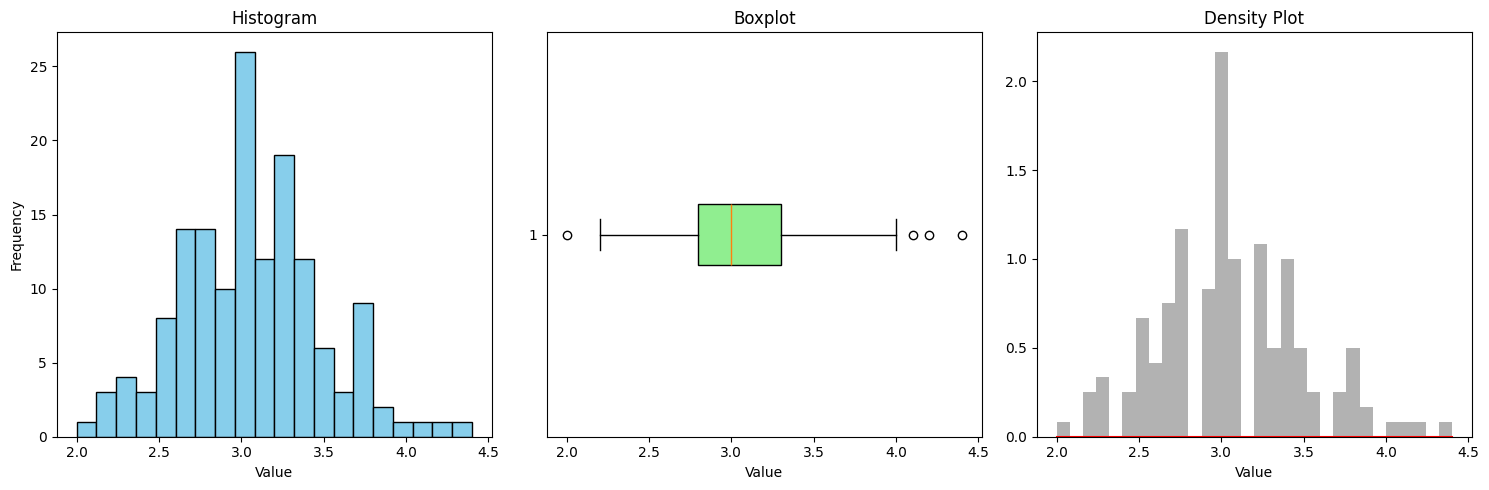

In [ ]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. Histogram
axes[0].hist(X['sepal width'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# 2. Boxplot
axes[1].boxplot(X['sepal width'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Value')

# 3. Density Plot
axes[2].hist(X['sepal width'], bins=30, density=True, alpha=0.6, color='gray')
density, bins, _ = axes[2].hist(X['sepal width'], bins=30, density=True, alpha=0)
axes[2].plot(bins, 1/(10 * np.sqrt(2 * np.pi)) * np.exp( - (bins - 50)**2 / (2 * 10**2) ), color='red')
axes[2].set_title('Density Plot')
axes[2].set_xlabel('Value')

# Adjust layout and display
plt.tight_layout()
plt.show()

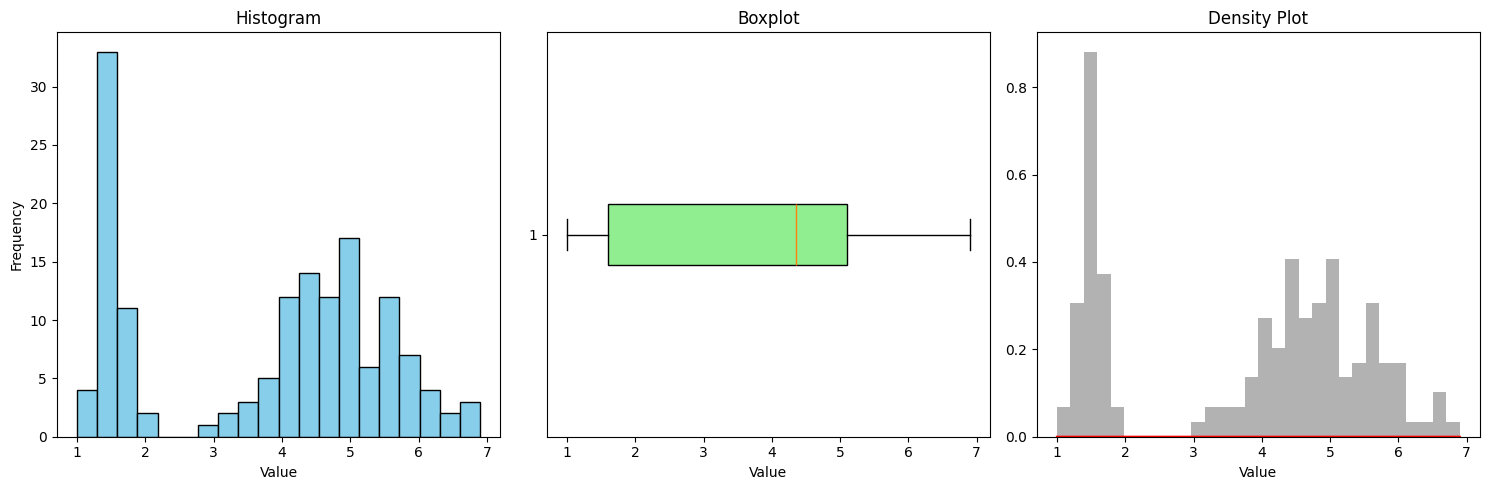

In [ ]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. Histogram
axes[0].hist(X['petal length'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# 2. Boxplot
axes[1].boxplot(X['petal length'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Value')

# 3. Density Plot
axes[2].hist(X['petal length'], bins=30, density=True, alpha=0.6, color='gray')
density, bins, _ = axes[2].hist(X['petal length'], bins=30, density=True, alpha=0)
axes[2].plot(bins, 1/(10 * np.sqrt(2 * np.pi)) * np.exp( - (bins - 50)**2 / (2 * 10**2) ), color='red')
axes[2].set_title('Density Plot')
axes[2].set_xlabel('Value')

# Adjust layout and display
plt.tight_layout()
plt.show()

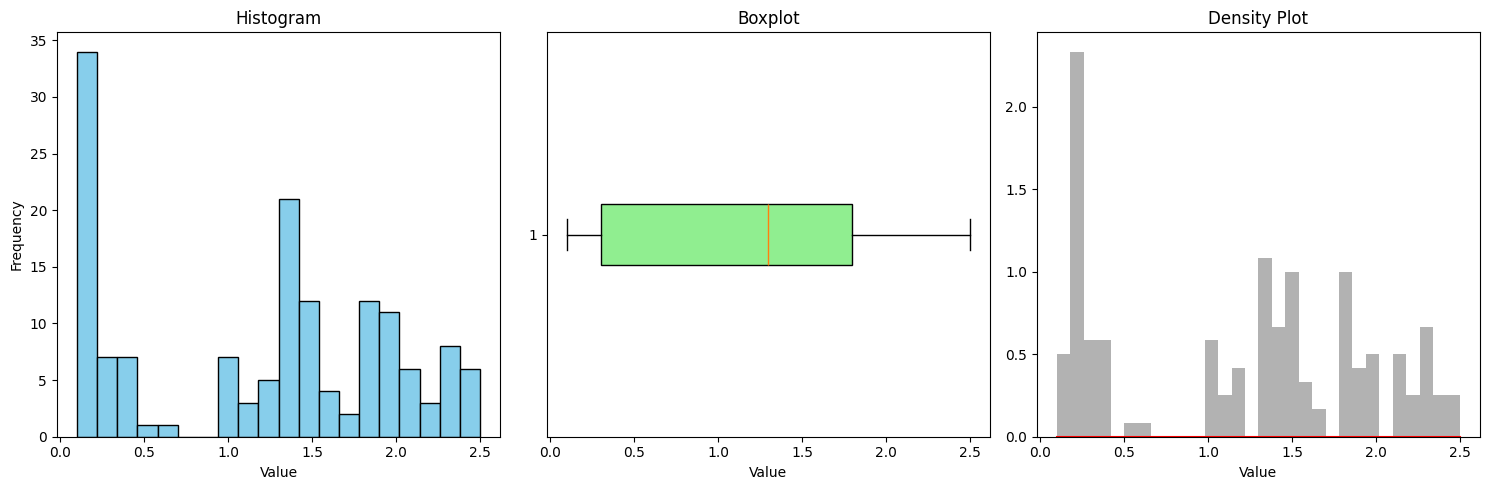

In [ ]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 1. Histogram
axes[0].hist(X['petal width'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# 2. Boxplot
axes[1].boxplot(X['petal width'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Value')

# 3. Density Plot
axes[2].hist(X['petal width'], bins=30, density=True, alpha=0.6, color='gray')
density, bins, _ = axes[2].hist(X['petal width'], bins=30, density=True, alpha=0)
axes[2].plot(bins, 1/(10 * np.sqrt(2 * np.pi)) * np.exp( - (bins - 50)**2 / (2 * 10**2) ), color='red')
axes[2].set_title('Density Plot')
axes[2].set_xlabel('Value')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [ ]:
# Checking the NULL values :
X.isna().sum()

,0
sepal length,0
sepal width,0
petal length,0
petal width,0


In [ ]:
y['class'].isna().sum()

0

In [ ]:
# Checking Duplicate :
# Check for duplicate rows
duplicate_rows = X[X.duplicated()]
duplicate_count = duplicate_rows.shape[0]

print(f"Number of duplicate rows: {duplicate_count}")
print("Duplicate rows:")
print(duplicate_rows)

Number of duplicate rows: 3
Duplicate rows:
     sepal length  sepal width  petal length  petal width
34            4.9          3.1           1.5          0.1
37            4.9          3.1           1.5          0.1
142           5.8          2.7           5.1          1.9


In [ ]:
# Now, building the model :
# Libraries Import ->
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

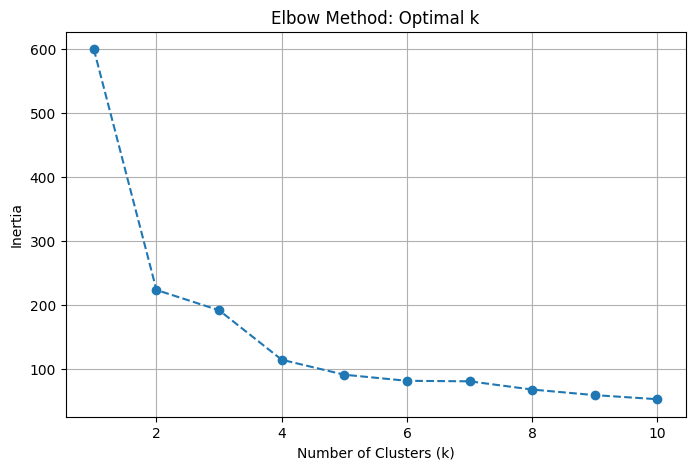

In [ ]:
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method: Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [ ]:
# Let number of clusters be 3 and later on 4 :
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)
labels = kmeans.labels_
X['Cluster'] = labels

In [ ]:
silhouette_avg = silhouette_score(scaled_data, labels)
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg:.2f}")

Silhouette Score for 3 clusters: 0.48


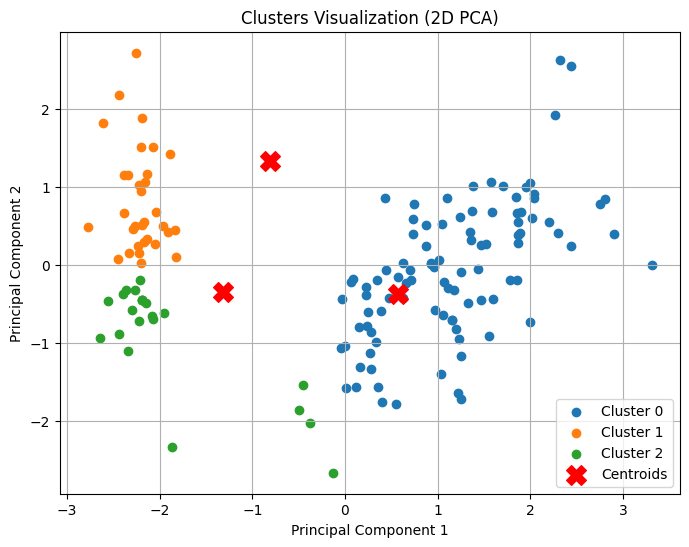

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Scatter plot
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(pca_data[labels == cluster, 0], pca_data[labels == cluster, 1], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Clusters Visualization (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Now, applying 4 clusters :
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)
labels = kmeans.labels_
X['Cluster'] = labels

In [ ]:
silhouette_avg = silhouette_score(scaled_data, labels)
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg:.2f}")

Silhouette Score for 4 clusters: 0.39


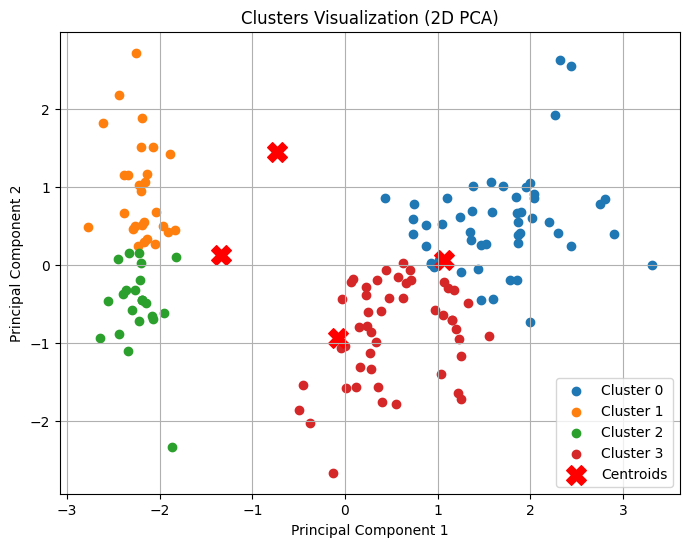

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Scatter plot
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(pca_data[labels == cluster, 0], pca_data[labels == cluster, 1], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Clusters Visualization (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Now, applying 2 clusters :
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)
labels = kmeans.labels_
X['Cluster'] = labels

In [ ]:
silhouette_avg = silhouette_score(scaled_data, labels)
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg:.2f}")

Silhouette Score for 2 clusters: 0.58


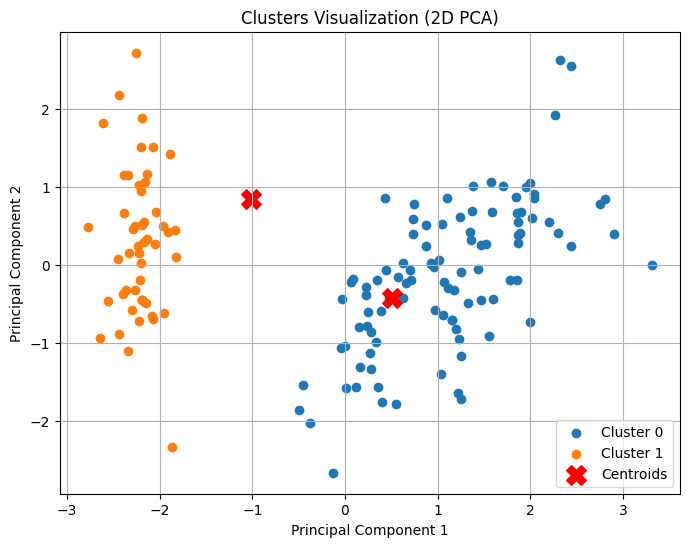

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Scatter plot
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(pca_data[labels == cluster, 0], pca_data[labels == cluster, 1], label=f'Cluster {cluster}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Clusters Visualization (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

## For the final result :
### We, can see that the silhouette score for k = 2 is the highest i.e. 0.58(Hence, its a good clustering)

* #### Silhouette score > 0.5 (Good Clustering)
* #### Silhouette score < 0.25 (Bad Clustering)
* #### 0.25 < Silhouette score < 0.5 (Fair Clustering)

*We, can use either k = 3 or k = 2 as they both are close to 0.5 which is good enough.*



### Problem Statement 2 : Implement K-Means Clustering with 2 variables in Python on Iris Dataset
* ### Visualization via Umap and T-SNE



In [ ]:
# Fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
data = iris.data.features

In [ ]:
data.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
cols1 = ['petal length','petal width']
d1 = data.drop(cols1,axis=1)

In [ ]:
d1

,sepal length,sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


### Problem Statement 3 : Create a sample (One small and Large)
* ### Predict the trend : Using Auto Correlation and ARIMA (No libraries except numpy)

